In [1]:
import sys
sys.path.append("..")
sys.path.append("../..")
sys.path.append("../../..")

from python_lib.pkl_saver import PklSaver
out_saver = PklSaver(".", "data.pkl")
data_dict = out_saver.load()

In [2]:
data_dict

{'workload_1': {'before': {2: [6, 8, 6, 7, 8, 6, 6, 6, 7, 7],
   4: [11, 8, 8, 8, 10, 9, 8, 9, 10, 9],
   6: [12, 11, 11, 11, 11, 11, 12, 10, 13, 12],
   8: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
   10: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
   12: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
   14: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
   16: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
   18: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
   20: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13]},
  'after': {2: [7, 9, 6, 7, 9, 7, 7, 7, 8, 8],
   4: [10, 9, 7, 8, 10, 9, 9, 9, 8, 10],
   6: [11, 10, 11, 10, 10, 11, 11, 10, 11, 10],
   8: [12, 12, 12, 13, 12, 11, 13, 13, 13, 12],
   10: [12, 13, 13, 13, 13, 13, 12, 13, 13, 13],
   12: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
   14: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
   16: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
   18: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
   20: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13]}},
 'workload_2': {'before': 

In [3]:
plot_data_dict = {}

total = 0
f_inf = 0
inf_f = 0

for k1, v1 in data_dict.items():
    print(k1)
    if k1 == "workload_3":
        continue
    for k2, v2 in v1["before"].items():
        # print(k2, v2)
        for before, after in zip(v1["before"][k2], v1["after"][k2]):
            total += 1
            if before <= 12 and after > 12:
                f_inf += 1
            if before > 12 and after <= 12:
                inf_f += 1
    print(inf_f)

                # print(before, after)
                # print("come??")
print(total)
print(f_inf)
print(inf_f)            


workload_1
9
workload_2
24
workload_3
workload_4
33
workload_5
42
400
2
42


KeyError: 'workload_1'

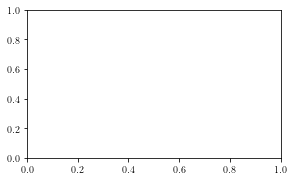

In [4]:

from statistics import median

import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 0.1
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
width = 0.1

markerst1 = 's'
markerst2 = 'p'
markerst3 = '^'
markerst4 = '*'
markerst5 = '|'

key_list = [i for i in range(2, 21, 2)]

fig, ax = plt.subplots(figsize=(10, 6))
# from matplotlib import gridspec
# plt.figure(figsize=(6, 6))
# gs = gridspec.GridSpec(nrows=2,
#                        ncols=2
#                       )

i = 0
for workload in ["workload_1", "workload_2", "workload_4", "workload_5"]:
    i += 1
    if i == 1:
        plt.subplot(2, 2, 1)
    if i == 2:
        plt.subplot(2, 2, 2)
    if i == 3:
        plt.subplot(2, 2, 3)
    if i == 4:
        plt.subplot(2, 2, 4)
    ax = plt.gca()

    for run_name in ["after", "before"]:
        # print(workload, run_name)

        plot_data = plot_data_dict[workload][run_name]
        
        if workload == "workload_1":
            workload_name = "T1"
            marker = markerst1
            color='C0'
            title = "Ensemble Type 1. Same Sketch Algo"
        if workload == "workload_2":
            workload_name = "T2"
            marker = markerst2
            color='C1'
            title = "Ensemble Type 2. Same Flowkey"
        if workload == "workload_3":
            workload_name = "T3"
            marker = markerst3
            color='C2'
        if workload == "workload_4":
            workload_name = "T3"
            marker = markerst3
            color='C2'
            title = "Ensemble Type 3. Same Epoch"
        if workload == "workload_5":
            workload_name = "T4"
            marker = markerst5
            color='C4'
            title = "Ensemble Type 4. Random"
        
        ax.set_title(title, fontsize=23, y=1.05)

        if run_name == "before":
            # label = f"(before) {workload_name}"
            label = f"before"
            linestyle = '--'
            alpha = 0.8
            linewidth=2
        
        elif run_name == "after":
            label = f"after"
            linestyle = '-'
            alpha = 1
            linewidth=3

        ax.plot(key_list, plot_data, label=label, color=color, marker=marker, alpha=alpha, linestyle=linestyle, linewidth=linewidth, markersize=8)

    from matplotlib.ticker import MultipleLocator
    ax.yaxis.set_major_locator(MultipleLocator(2))

    ax.set_ylim([0, 11])

    # plt.xticks(fontsize=30)


    # new_x = [i for i in range(2, 21, 2)]
    # new_x_label = [i for i in range(2, 21, 2)]

    new_x = [4, 8, 12, 16, 20]
    new_x_label = [4, 8, 12, 16, 20]

    ax.set_xticks(new_x)
    ax.set_xticklabels(new_x_label, fontsize=23)
    ax.tick_params(axis='y', labelsize=23)
    ax.set_ylabel('Number of Feasible \n Ensembles', fontsize=21)
    ax.set_xlabel('Number of Sketch Instances', fontsize=23)

    plt.legend(loc='upper right', fontsize=18, ncol=1,
            columnspacing=0.8,
            handleheight=0.3,
            handletextpad=0.2,
            borderaxespad=0.3,
            labelspacing=0.2,
            borderpad=0.2)

    plt.grid(color='gray', linestyle='--', linewidth=2, axis='y')

fig.tight_layout()

# latex_path = "/Users/hnamkung/hun-latex/Hun-multi-dim-sketches/nsdi23/figures/6_evaluation"
latex_path = "."
import os
full_path = os.path.join(latex_path, "overall.pdf")
plt.savefig(full_path, bbox_inches='tight', pad_inches=0.02)
plt.show()

